In [1]:
#conda install -c conda-forge kneed

In [2]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from pandas import DataFrame
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import plotly.express as px

%matplotlib inline

Lets Load the data to see what we have

In [3]:
data = pd.read_csv("./cricketers.csv", sep='\t', engine='python')

Lets Print top 5 data. As this is unsupervised learning so Label (Output Column) will be unknown

In [4]:
data.head()

,PLAYER,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
0,Aaron Finch,10,9,134,46,100,16.75,144.00,0,0.0,0,0,0.0,0.0
1,AB de Villiers,12,11,480,90,275,53.33,174.54,0,0.0,0,0,0.0,0.0
2,Abhishek Sharma,3,3,63,46,33,63.00,190.90,0,0.0,0,0,0.0,0.0
3,Ajinkya Rahane,15,14,370,65,313,28.46,118.21,0,0.0,0,0,0.0,0.0
4,Alex Hales,6,6,148,45,118,24.66,125.42,0,0.0,0,0,0.0,0.0


# Lets see the shape of data

In [5]:
data.shape


(109, 14)

we have 109 rows and 14 colums

# Let see the data info

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PLAYER                    109 non-null    object 
 1   matches_played            109 non-null    int64  
 2   innings_batted            109 non-null    int64  
 3   runs_scored               109 non-null    int64  
 4   highest_runs              109 non-null    int64  
 5   balls_faced               109 non-null    int64  
 6   average_runs              109 non-null    float64
 7   strike_rate               109 non-null    float64
 8   innings_bowled            109 non-null    int64  
 9   overs                     109 non-null    float64
 10  runs_given                109 non-null    int64  
 11  wickets_obtained          109 non-null    int64  
 12  average_runs_per_wicket   109 non-null    float64
 13  bowling_economy           109 non-null    float64
dtypes: float64

 there are no missing values as all the columns has 109 entries properly

In [7]:
data.describe()

,matches_played,innings_batted,runs_scored,highest_runs,balls_faced,average_runs,strike_rate,innings_bowled,overs,runs_given,wickets_obtained,average_runs_per_wicket,bowling_economy
count,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.000000,109.00000,109.000000,109.000000,109.000000
mean,9.559633,7.889908,173.633028,43.495413,124.669725,22.360092,122.258716,4.513761,13.894495,119.93578,3.926606,17.334862,5.149817
std,5.161164,4.982078,182.356522,29.830268,123.670265,16.093453,48.576709,5.449456,18.395495,152.80763,5.602094,21.910816,4.773435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-0.000000,0.000000
25%,5.000000,4.000000,36.000000,20.000000,33.000000,11.800000,109.090000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,10.000000,7.000000,99.000000,40.000000,76.000000,21.160000,130.260000,2.000000,3.000000,27.00000,0.000000,0.000000,7.280000
75%,14.000000,13.000000,260.000000,62.000000,188.000000,30.000000,146.040000,8.000000,26.000000,223.00000,6.000000,28.360000,9.230000
max,17.000000,17.000000,735.000000,128.000000,516.000000,75.830000,300.000000,17.000000,68.000000,533.00000,24.000000,108.000000,16.500000


# Feature slection for the model
#Considering only 2 features (average_runs and bowling_economy) and no Label available


In [8]:
X=data.iloc[:, [6,13]].values

# Normalize the data attributes so that attributes are on the same scale

In [9]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

# Lets find the cluster with k=2 and plot . It will help in finding the pattern in data

In [10]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42 )

## kmeans.fit(scaled_features)

In [11]:
label = kmeans.fit_predict(scaled_features)
label

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Ploting clusters on a scatter plot with X and Y being the two attributes namely average_runs and bowling_economy, respectively.

Text(0.5, 1.0, 'average_runs and bowling_economy cluster')

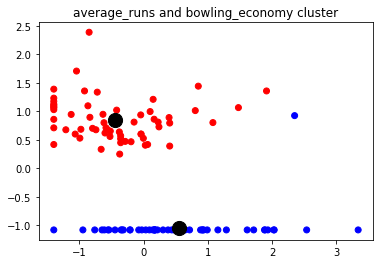

In [12]:
centers = np.array(kmeans.cluster_centers_)
LABEL_COLOR_MAP = {0:'r', 1:'b'}

label_color = [LABEL_COLOR_MAP[l] for l in label]
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=label_color)


plt.scatter(centers[:,0], centers[:,1], marker="o", color='k', s=200)
plt.title('average_runs and bowling_economy cluster')

In [13]:
# to locate the centroids of the clusters
kmeans.cluster_centers_

array([[-0.44736787,  0.8516665 ],
       [ 0.5477974 , -1.04285693]])

In [14]:
#the lowest SSE values
kmeans.inertia_

94.47757393181925

In [15]:
# Number of iterations required to converge
kmeans.n_iter_

4

In [16]:
kmeans.labels_[:20]

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

# Interpretion of the output

From above scattered plot its seems , its not properly clustered, hence we need to increste the No of cluster. inertia looks higher on side, it seems its not converged yet. Blue cluster is more dense.

Since lower the economy rate is, the better the bowler is performing.Hence Bowler in blue cluster had performed well than the red cluster 

# Lets find the cluster with K=3

In [17]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42 )

In [18]:
label = kmeans.fit_predict(scaled_features)
label

array([0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 2, 0,
       0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
# to locate the centroids of the clusters
kmeans.cluster_centers_



array([[ 0.08347382, -1.08383228],
       [-0.54928285,  0.83992318],
       [ 1.88137272, -0.51825512]])

In [20]:
#the lowest SSE values
kmeans.inertia_

59.746886707243625

In [21]:

# Number of iterations required to converge
kmeans.n_iter_

3

In [22]:
kmeans.labels_[:20]

array([0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2, 1, 1, 0])

# Visualize the cluster for K=3

Text(0.5, 1.0, 'average_runs(red) and bowling_economy(blue)')

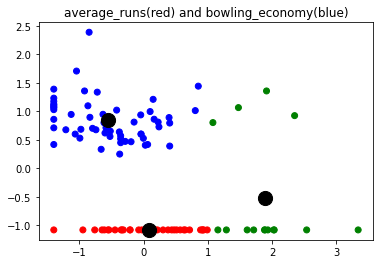

In [23]:


centers = np.array(kmeans.cluster_centers_)
LABEL_COLOR_MAP = {0:'r', 1:'b', 2:'g'}

label_color = [LABEL_COLOR_MAP[l] for l in label]
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=label_color)


plt.scatter(centers[:,0], centers[:,1], marker="o", color='k', s=200)
plt.title('average_runs(red) and bowling_economy(blue)')


Interpretation
Since lower the economy rate is, the better the bowler is performing hence we can say
Bowler in red cluster has performed very well
Bowler in green cluster has performed ok
Bowler in Blue color need to improve on bowling


# Lets find the cluster for K=4

In [24]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=4,
    n_init=10,
    max_iter=300,
    random_state=42 )

In [25]:
label = kmeans.fit_predict(scaled_features)
label

array([2, 0, 0, 2, 2, 0, 3, 1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 1, 3, 2, 1, 3,
       1, 0, 3, 3, 0, 3, 2, 2, 2, 1, 1, 3, 0, 2, 2, 2, 1, 1, 0, 3, 0, 2,
       2, 2, 1, 3, 0, 3, 2, 2, 2, 1, 3, 2, 1, 1, 3, 1, 1, 0, 3, 2, 1, 2,
       2, 3, 2, 1, 1, 3, 2, 0, 2, 2, 2, 2, 2, 3, 3, 1, 0, 1, 2, 3, 0, 2,
       1, 3, 0, 0, 3, 1, 3, 0, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [26]:
# to locate the centroids of the clusters
kmeans.cluster_centers_


array([[ 1.67060945, -0.96572687],
       [-0.98742221,  0.94219953],
       [-0.04869651, -1.08383228],
       [ 0.21269854,  0.74101501]])

In [27]:
#the lowest SSE values
kmeans.inertia_

39.51557548442673

In [28]:
# Number of iterations required to converge
kmeans.n_iter_

6

In [29]:
kmeans.labels_[:20]

array([2, 0, 0, 2, 2, 0, 3, 1, 1, 3, 3, 1, 2, 3, 0, 2, 3, 1, 3, 2])

# Visualize the cluster for K=4

Text(0.5, 1.0, 'average_runs and bowling_economy')

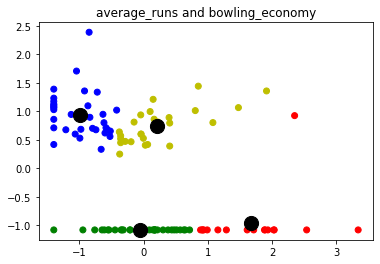

In [30]:

centers = np.array(kmeans.cluster_centers_)
LABEL_COLOR_MAP = {0:'r', 1:'b', 2:'g',3:'y'}

label_color = [LABEL_COLOR_MAP[l] for l in label]
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=label_color)


plt.scatter(centers[:,0], centers[:,1], marker="o", color='k', s=200)
plt.title('average_runs and bowling_economy')


Interpretation
Blue cluster has good bowling economy
Cricketers in yellow looks more better with averaage runs and bowling economy
Cricketers in Green and Red cluster need improvement for bowling economy as avarerage run is more 

#  Lets find the cluster for K=5

In [31]:
kmeans = KMeans(
    init="k-means++",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42 )

In [32]:
label = kmeans.fit_predict(scaled_features)
label

array([2, 3, 3, 2, 2, 3, 1, 4, 1, 1, 1, 4, 2, 1, 3, 2, 0, 4, 1, 2, 4, 1,
       1, 3, 1, 1, 3, 0, 2, 2, 2, 1, 4, 1, 0, 2, 2, 2, 4, 4, 3, 0, 3, 2,
       2, 2, 1, 1, 3, 1, 2, 2, 2, 1, 1, 2, 4, 4, 1, 4, 1, 3, 1, 2, 4, 2,
       2, 1, 2, 1, 1, 1, 2, 3, 2, 2, 2, 2, 2, 1, 0, 4, 3, 4, 2, 1, 3, 2,
       4, 1, 3, 3, 1, 4, 0, 3, 1, 2, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [33]:
# to locate the centroids of the clusters
kmeans.cluster_centers_


array([[ 1.41213093,  1.10039557],
       [-0.16199621,  0.65674512],
       [-0.04869651, -1.08383228],
       [ 1.62817026, -1.08383228],
       [-1.12421341,  1.02876889]])

In [34]:
#the lowest SSE values
kmeans.inertia_

28.111723071065978

In [35]:
# Number of iterations required to converge
kmeans.n_iter_

4

In [36]:
kmeans.labels_[:20]

array([2, 3, 3, 2, 2, 3, 1, 4, 1, 1, 1, 4, 2, 1, 3, 2, 0, 4, 1, 2])

# Visualize the cluster for K=5

Text(0.5, 1.0, 'average_runs and bowling_economy')

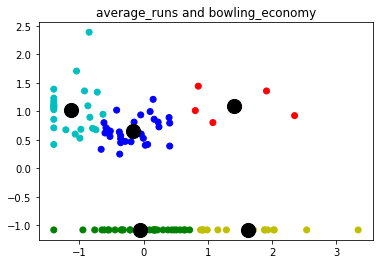

In [37]:

centers = np.array(kmeans.cluster_centers_)
LABEL_COLOR_MAP = {0:'r', 1:'b', 2:'g',3:'y', 4:'c'}

label_color = [LABEL_COLOR_MAP[l] for l in label]
plt.scatter(scaled_features[:,0], scaled_features[:,1], c=label_color)


plt.scatter(centers[:,0], centers[:,1], marker="o", color='k', s=200)
plt.title('average_runs and bowling_economy')


Interpretation
Players in cyan had good average bowling economy and given less run. other players can learn from them
Players in green and yellow has good bowling economy and given more runs
Plaayers in blue are also average 
Players in red  color need to improve


# #Visualizing the ELBOW method to get the optimal value of K 

In [38]:
from sklearn.cluster import KMeans
inertias=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(scaled_features)
    inertias.append(kmeans.inertia_)

C:\Users\Shilpi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


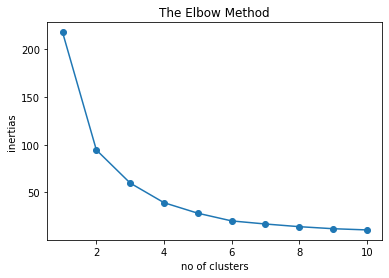

In [39]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), inertias, marker='o')
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('inertias')
plt.show()

In [40]:
#From above curve we can see that k=5 looks more optimal
#no matter what range we select ex- (1,21) also i will see the same behaviour
#but if we chose higher range it is little difficult to visualize the ELBOW
#that is why we usually prefer range (1,11)
##Finally we got that k=4

# Lets build model with optimal value of K

In [41]:

kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(scaled_features)


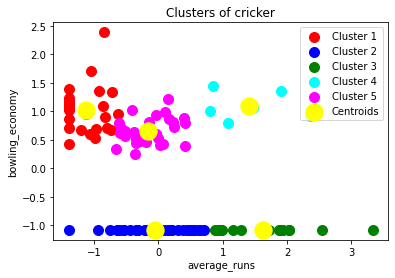

In [42]:
#Visualizing all the clusters 

plt.scatter(scaled_features[y_kmeans == 0, 0], scaled_features[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_features[y_kmeans == 1, 0], scaled_features[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_features[y_kmeans == 2, 0], scaled_features[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(scaled_features[y_kmeans == 3, 0], scaled_features[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(scaled_features[y_kmeans == 4, 0], scaled_features[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of cricker')
plt.xlabel('average_runs')
plt.ylabel('bowling_economy')
plt.legend()

plt.show()

# Conclusions

Bowler in cluster 1 are best with good bowling and given less avarage runs


# Lets find the cluster for some other columns apart from mentioned in assignment i will consider  matches_played and run_scored

In [43]:
df=data.iloc[:, [1,3]].values

In [44]:
scaler2 = StandardScaler()
scaled_features2 = scaler.fit_transform(df)

In [45]:
kmeansmodel = KMeans(n_clusters= 6, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(scaled_features2)


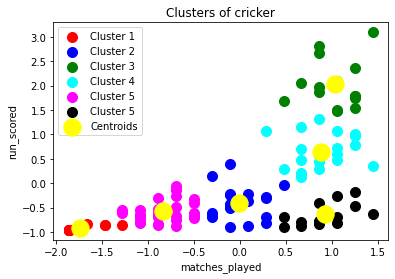

In [46]:
#Visualizing all the clusters 

plt.scatter(scaled_features2[y_kmeans == 0, 0], scaled_features2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_features2[y_kmeans == 1, 0], scaled_features2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_features2[y_kmeans == 2, 0], scaled_features2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(scaled_features2[y_kmeans == 3, 0], scaled_features2[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(scaled_features2[y_kmeans == 4, 0], scaled_features2[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(scaled_features2[y_kmeans == 5, 0], scaled_features2[y_kmeans == 5, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of cricker')
plt.xlabel('matches_played')
plt.ylabel('run_scored')
plt.legend()
plt.show()

# Interpretation:-

Cricketers in cluster 3 are best as they have scored more runs
 cricketers in cluster 1  need to improve their batting skills, they have played more match but performed relatively low the player in cluster 3.
 Cricketers in cluster 1 has played less match, they should be given more channce to play
 Cricketers in cluster 4 are also doing well with more runs.